In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_parquet("data/results_vwap.parquet")
data

,Stock,month,count
0,C.N,2008-01-02,391
1,C.N,2008-01-03,391
2,C.N,2008-01-04,391
3,C.N,2008-01-07,391
4,C.N,2008-01-08,390
...,...,...,...
2778,WFC.N,2008-12-24,214
2779,WFC.N,2008-12-26,390
2780,WFC.N,2008-12-29,389
2781,WFC.N,2008-12-30,391


In [3]:
data.rename(columns={"month": "time"}, inplace=True)
data["time"] = pd.to_datetime(data["time"])
data.head()

,Stock,time,count
0,C.N,2008-01-02,391
1,C.N,2008-01-03,391
2,C.N,2008-01-04,391
3,C.N,2008-01-07,391
4,C.N,2008-01-08,390


In [4]:
data = pd.read_parquet("data/vwap_bbo_data_with_mid_prices.parquet")
data.head()

,time,Stock,bid_vwa,ask_vwa,vwap_mid_price
0,2008-04-23 14:26,PG.N,67.096526,67.110915,67.103720
1,2008-08-07 13:28,C.N,18.899127,18.911981,18.905554
2,2008-08-25 15:49,RTN.N,59.832404,59.834434,59.833419
3,2008-11-25 10:38,RTN.N,46.339335,46.404700,46.372018
4,2008-01-15 12:58,TWX.N,15.950000,15.960000,15.955000


In [5]:
#set index to datetime
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# Create a pivot table with the count of VWAP values for each ticker and minute
data_pivot = data.pivot_table(index='time', columns='Stock', values='vwap_mid_price')
data_pivot

Stock,C.N,EMC.N,HPQ.N,MDT.N,MO.N,NKE.N,PG.N,RTN.N,SO.N,TWX.N,WFC.N
time,,,,,,,,,,,
2008-01-02 09:30:00,29.690292,18.494578,50.502681,49.949452,75.641465,NaN,NaN,NaN,38.682798,16.480169,30.082956
2008-01-02 09:31:00,29.717395,18.476780,50.591862,49.956113,75.606653,64.201838,73.185957,60.486471,38.543432,16.493539,30.054756
2008-01-02 09:32:00,29.807299,18.494106,50.602404,50.099181,75.819966,64.145640,72.960064,60.553336,38.580609,16.514564,30.036400
2008-01-02 09:33:00,29.712021,18.565069,50.608779,50.110141,75.652896,64.117737,72.802778,60.635183,38.647831,16.522132,29.992047
2008-01-02 09:34:00,29.609640,18.541359,50.606990,50.160005,75.574816,63.963075,72.699492,60.541008,38.651715,16.523591,30.015928
...,...,...,...,...,...,...,...,...,...,...,...
2008-12-31 15:56:00,6.896138,10.476895,36.428676,31.541954,15.105250,51.156572,62.071888,51.217836,37.051967,10.058847,29.941728
2008-12-31 15:57:00,6.909711,10.476285,36.449454,31.559547,15.114467,51.095843,62.069765,51.228353,37.044428,10.078695,29.985755
2008-12-31 15:58:00,6.915223,10.484686,36.439633,31.556522,15.124905,51.106748,62.096242,51.202314,37.074481,10.092738,30.029832


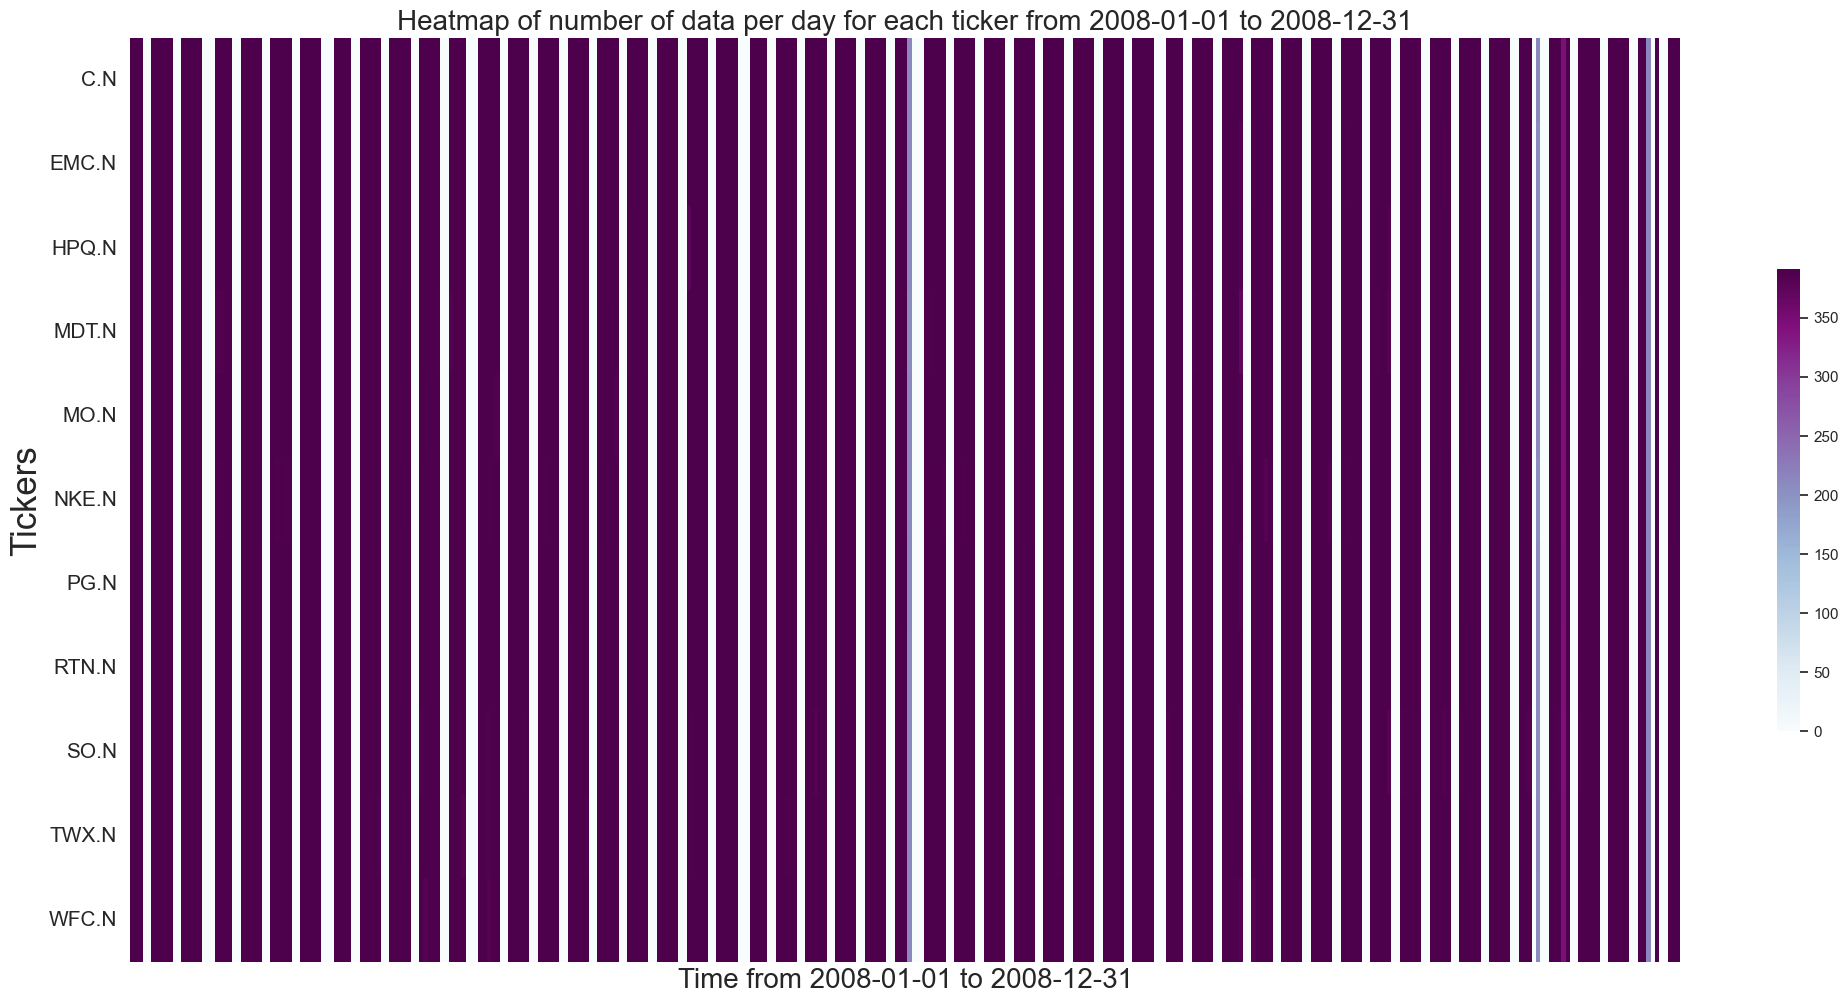

In [8]:
import matplotlib.ticker as ticker
daily_data_count = data_pivot.resample('D').count() 
sns.set(font_scale=1)
# Use the count of data points as values for the heatmap
# If there's no data for a day, it will be NaN, which will be shown as a white space in the heatmap
pivot_table = daily_data_count.transpose()

# Create the heatmap

# Create the heatmap with figsize adjusted for better visibility
plt.figure(figsize=(25, 12))
ax = sns.heatmap(pivot_table, cmap="BuPu", linewidths=0, linecolor=None, cbar_kws={"shrink": .5} , yticklabels=True, xticklabels=False)

#increse font x and y labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=20)
ax.set_xlabel('Time from 2008-01-01 to 2008-12-31', fontsize=20)
ax.set_ylabel('Tickers', fontsize=25)

plt.title('Heatmap of number of data per day for each ticker from 2008-01-01 to 2008-12-31', fontsize=20)

folder_path = 'plots'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define the file path to save the plot
file_path = os.path.join(folder_path, 'heatmap_tickers.png')

# Save the plot
plt.savefig(file_path)


plt.show()